#### HW11 

We will start by loading packages and set up the preliminary structs

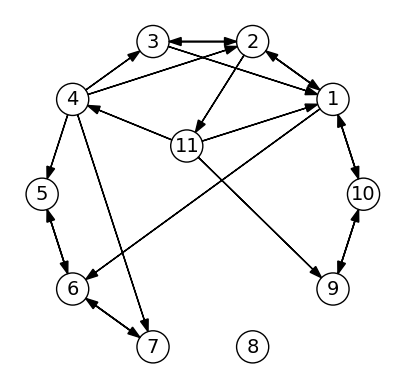

In [29]:
using PyPlot, SparseArrays   # Packages needed

struct Vertex
    neighbors::Vector{Int}       # Indices of neighbors of this Vertex
    coordinates::Vector{Float64} # 2D coordinates of this Vertex - only for plotting
    Vertex(neighbors; coordinates=[0,0]) = new(neighbors, coordinates)
end

function Base.show(io::IO, v::Vertex)
    print(io, "Neighbors = ", v.neighbors)
end

struct Graph
    vertices::Vector{Vertex}
end

function Base.show(io::IO, g::Graph)
    for i = 1:length(g.vertices)
        println(io, "Vertex $i, ", g.vertices[i])
    end
end

function PyPlot.plot(g::Graph; scale=1.0)
    fig, ax = subplots()
    ax.set_aspect("equal")
    
    xmin = minimum(v.coordinates[1] for v in g.vertices)
    xmax = maximum(v.coordinates[1] for v in g.vertices)
    ymin = minimum(v.coordinates[2] for v in g.vertices)
    ymax = maximum(v.coordinates[2] for v in g.vertices)
    sz = max(xmax-xmin, ymax-ymin)
    cr = scale*0.05sz
    hw = cr/2
    axis([xmin-2cr,xmax+2cr,ymin-2cr,ymax+2cr])
    axis("off")

    for i in 1:length(g.vertices)
        c = g.vertices[i].coordinates
        ax.add_artist(matplotlib.patches.Circle(c, cr, facecolor="none", edgecolor="k"))
        ax.text(c[1], c[2], string(i),
                horizontalalignment="center", verticalalignment="center", fontsize=round(Int, 14*scale))
        for nb in g.vertices[i].neighbors
            cnb = g.vertices[nb].coordinates
            dc = cnb .- c
            L = sqrt(sum(dc.^2))
            c1 = c .+ cr/L * dc
            c2 = cnb .- cr/L * dc
            arrow(c1[1], c1[2], c2[1]-c1[1], c2[2]-c1[2],
                  head_width=hw, length_includes_head=true, facecolor="k")
        end
    end
end


function shortest_path_bfs(g::Graph, start, finish)
    parent = zeros(Int64, length(g.vertices))
    S = [start]
    parent[start] = start
    while !isempty(S)
        ivertex = popfirst!(S)
        if ivertex == finish
            break
        end
        for nb in g.vertices[ivertex].neighbors
            if parent[nb] == 0 # Not visited yet
                parent[nb] = ivertex
                push!(S, nb)
            end
        end
    end
    # Build path
    path = Int64[]
    iv = finish
    while true
        pushfirst!(path, iv)
        if iv == start
            break
        end
        iv = parent[iv]
    end
    return path
end

# Example graph from lecture notes
all_neighbors = [[2,10,6], [3,1,11], [1,2], [5,3,2,7], [6],
                 [7,5], [6], Int64[], [10], [1,9], [1,4,9]]
all_coordinates = [[0.81, 0.59], [0.31, 0.95], [-0.31, 0.95], [-0.81, 0.59],
                   [-1.0, 0.0],  [-0.81, -0.59], [-0.31, -0.95], [0.31, -0.95],
                   [0.81, -0.59], [1.0, -0.0], [-0.1, 0.3]]
g = Graph([Vertex(n,coordinates=c) for (n,c) in zip(all_neighbors, all_coordinates)])
plot(g)

#### Problem 1 - Graph to adjacency matrix

In [30]:
function convert2adjmatrix(g::Graph)
    n = length(g.vertices)
    row = []
    col = []

    for i in 1:n
        for j in g.vertices[i].neighbors
            push!(row,i)
            push!(col,j)
        end
    end
    val = ones(Int,length(row))
    println("row is: ", row)
    println("col is: ", col)
    println("val is: ", val)
    A = sparse(row,col,val,n,n)
    return A
end

convert2adjmatrix (generic function with 1 method)

row is: Any[1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 4, 5, 6, 6, 7, 9, 10, 10, 11, 11, 11]
col is: Any[2, 10, 6, 3, 1, 11, 1, 2, 5, 3, 2, 7, 6, 7, 5, 6, 10, 1, 9, 1, 4, 9]
val is: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


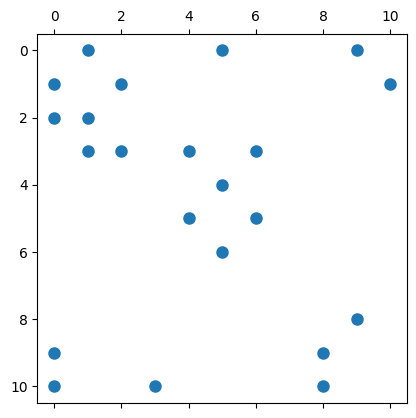

In [32]:
# For testing
A = convert2adjmatrix(g)
spy(A, marker=".", markersize=16);

#### Problem 2 - Spanning tree

In [89]:
function spanning_tree(g::Graph, start)
    visted = falses(length(g.vertices))
    tree = []
    for i in g.vertices
        push!(tree , Vertex([], coordinates = i.coordinates)) #Create graph with no edge among nodes
    end
    #Now we will implement the recursive step
    function visit(ivertex)
        visted[ivertex] = true
        for nb in g.vertices[ivertex].neighbors
            #println("now we test ", ivertex, " neighbors: ", nb)
            if !visted[nb]
                push!(tree[ivertex].neighbors,nb)
                visit(nb)
            end
        end
    end
    visit(start)
    gtree = Graph(tree)
end

spanning_tree (generic function with 1 method)

now we test 1neighbors: 2
now we test 2neighbors: 3
now we test 3neighbors: 1
now we test 3neighbors: 2
now we test 2neighbors: 1
now we test 2neighbors: 11
now we test 11neighbors: 1
now we test 11neighbors: 4
now we test 4neighbors: 5
now we test 5neighbors: 6
now we test 6neighbors: 7
now we test 7neighbors: 6
now we test 6neighbors: 5
now we test 4neighbors: 3
now we test 4neighbors: 2
now we test 4neighbors: 7
now we test 11neighbors: 9
now we test 9neighbors: 10
now we test 10neighbors: 1
now we test 10neighbors: 9
now we test 1neighbors: 10
now we test 1neighbors: 6


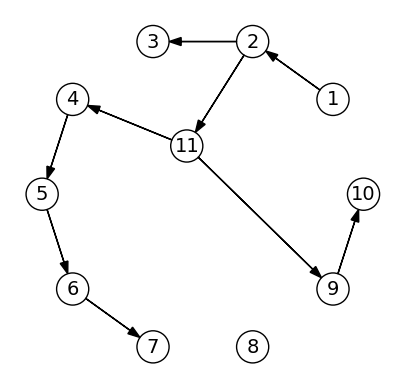

In [90]:
# For testing
gtree = spanning_tree(g,1)
plot(gtree)
     